# Aufgabenstellung 2

In [14]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [15]:
import matplotlib.pyplot as plt
import numpy             as np

In [16]:
# Parameter
h         = 0.002  # Schrittweite
t_end     = 120

In [17]:
# Anlegen der Ergebnisarrays
steps = int(t_end/h)
print('steps =', steps)

x_RK2   = np.zeros(steps)  # Output für abhängige Variable (berechnet mit RK2)
y_RK2   = np.zeros(steps)  # Output für abhängige Variable (berechnet mit RK2)
z_RK2   = np.zeros(steps)  # Output für abhängige Variable (berechnet mit RK2)
t       = np.zeros(steps)  # Array für unabhängige Variable

steps = 60000


In [18]:
# Initialisierung des Anfangswertes
x_RK2[0]   = 0.01
y_RK2[0]   = 0.01
z_RK2[0]   = 0.0
t[0]       = 0

steps       = 59999
range_steps = range(0, 59999)


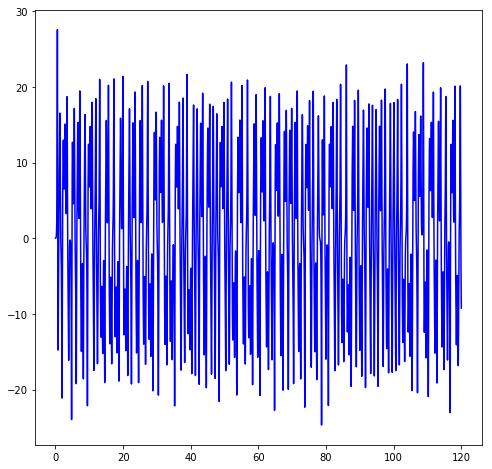

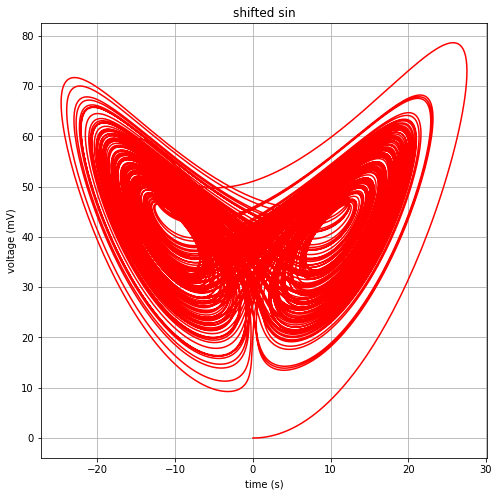

In [21]:
def x_dot(x,y):
    return -10*(x-y)

def y_dot(x,y,z):
    return (40-z)*x+y

def z_dot(x,y,z):
    return x*y-2.67*z
# Euler-Iteration

print('steps       =',steps-1)
print('range_steps =',range(steps-1))

# jetzt mit RK2 die 
for i in range(steps-1) :
    k1 = h * x_dot(x_RK2[i],y_RK2[i])
    l1 = h * y_dot(x_RK2[i],y_RK2[i],z_RK2[i])
    m1 = h * z_dot(x_RK2[i],y_RK2[i],z_RK2[i])
    
    k2 = h * x_dot(x_RK2[i]+k1/2, y_RK2[i]+l1/2)
    l2 = h * y_dot(x_RK2[i]+k1/2, y_RK2[i]+l1/2, z_RK2[i]+m1/2)
    m2 = h * z_dot(x_RK2[i]+k1/2, y_RK2[i]+l1/2, z_RK2[i]+m1/2)  
    
    x_RK2[i+1] = x_RK2[i] + k2
    y_RK2[i+1] = y_RK2[i] + l2
    z_RK2[i+1] = z_RK2[i] + m2
    
    t[i+1]       = t[i] + h


    
# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(8,8))
#fig, ax = plt.subplots(figsize=(8,8))
ax.plot( t, x_RK2,'b')
fig, ax = plt.subplots(figsize=(8,8))
ax.plot( x_RK2, z_RK2,'r')

ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='shifted sin')
ax.grid()

fig.savefig("test.png")
plt.show()